In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
data = pd.read_csv("spotify_data.csv")

In [4]:
data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,...,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,NaN,20995.0,Euphoric Hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,...,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,NaN,20996.0,Greatest Hardstyle Playlist
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,...,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,NaN,20997.0,Best of Hardstyle 2020
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,...,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,NaN,20998.0,Euphoric Hardstyle


In [5]:
data.shape

(42305, 22)

In [6]:
# Exploratory Data Analysis
# 1. Summary Statistics
print(data.describe())

       danceability        energy           key      loudness          mode  \
count  42305.000000  42305.000000  42305.000000  42305.000000  42305.000000   
mean       0.639364      0.762516      5.370240     -6.465442      0.549462   
std        0.156617      0.183823      3.666145      2.941165      0.497553   
min        0.065100      0.000243      0.000000    -33.357000      0.000000   
25%        0.524000      0.632000      1.000000     -8.161000      0.000000   
50%        0.646000      0.803000      6.000000     -6.234000      1.000000   
75%        0.766000      0.923000      9.000000     -4.513000      1.000000   
max        0.988000      1.000000     11.000000      3.148000      1.000000   

        speechiness  acousticness  instrumentalness      liveness  \
count  42305.000000  42305.000000      42305.000000  42305.000000   
mean       0.136561      0.096160          0.283048      0.214079   
std        0.126168      0.170827          0.370791      0.175576   
min        0

In [7]:
data.isnull().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

In [8]:
data.type.value_counts()

audio_features    42305
Name: type, dtype: int64

In [9]:
data.id.value_counts()

7D5qMGajdfznFcXFArk5VE    9
5cRDn5aGMLvWsldoRmOOz0    8
5lXY6PTuWXOludKy4zDQwM    8
3BSuC9Y6MhalaLlhyNbTYZ    8
2KVv2zAjDHxymySY5EIaAz    7
                         ..
6hEHxpZpvZwt1v4NoGwjKr    1
5TvdhNXoHbeGeWtjCYhFuy    1
0PIhZHuUMkxYIueyOJ9rSh    1
2V28RKTOabMKk2xvIDyCEz    1
6MAAMZImxcvYhRnxDLTufD    1
Name: id, Length: 35877, dtype: int64

In [10]:
data.danceability.value_counts()

0.804    189
0.808    163
0.800    150
0.802    149
0.803    149
        ... 
0.984      1
0.121      1
0.164      1
0.137      1
0.234      1
Name: danceability, Length: 890, dtype: int64

In [11]:
data.energy.value_counts()

0.9770    188
0.9420    175
0.9530    171
0.9560    168
0.9700    166
         ... 
0.0297      1
0.0485      1
0.0596      1
0.0723      1
0.2060      1
Name: energy, Length: 917, dtype: int64

In [12]:
data.key.value_counts()

1     7537
7     4275
11    4150
6     3714
0     3470
8     3345
9     3254
10    3251
2     3047
5     2994
4     2368
3      900
Name: key, dtype: int64

In [13]:
data.loudness.value_counts()

-6.142     20
-6.186     20
-5.943     19
-5.892     19
-5.572     17
           ..
-15.880     1
-14.181     1
-14.246     1
-4.968      1
-3.330      1
Name: loudness, Length: 11654, dtype: int64

In [14]:
data['mode'].value_counts()

1    23245
0    19060
Name: mode, dtype: int64

In [15]:
data.speechiness.value_counts()

0.1020    122
0.1030    115
0.1060    114
0.1040    114
0.1090    113
         ... 
0.6030      1
0.6660      1
0.0244      1
0.0238      1
0.7600      1
Name: speechiness, Length: 1447, dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

<Axes: title={'center': 'Distribution of Danceability'}, ylabel='Frequency'>

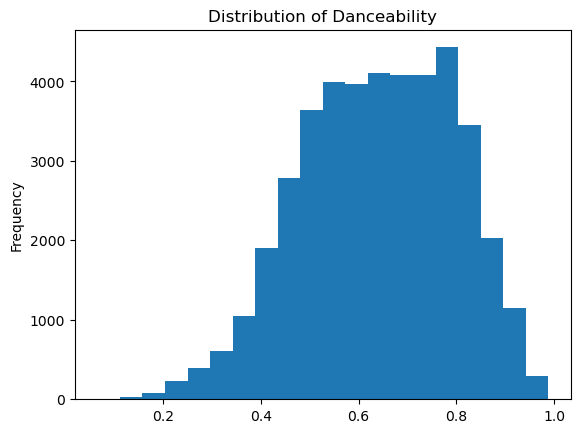

In [17]:
# 2. Data Visualization
# Example: Histogram of danceability
data['danceability'].plot(kind='hist', bins=20, title='Distribution of Danceability')


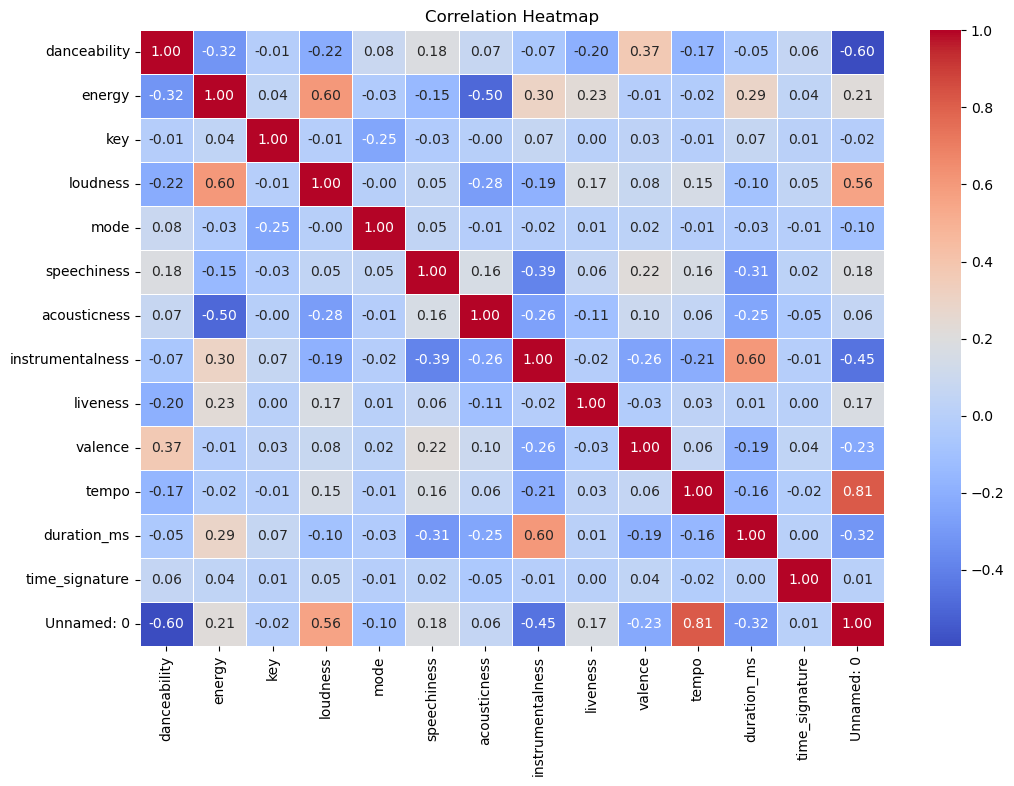

In [18]:
# Correlation Heatmap
corelation_matrix = data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corelation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')

plt.show()

In [19]:
# 3. Correlation Analysis
correlation_matrix = data.corr()
print(correlation_matrix)

                  danceability    energy       key  loudness      mode  \
danceability          1.000000 -0.323248 -0.012708 -0.216776  0.084413   
energy               -0.323248  1.000000  0.044731  0.601540 -0.032203   
key                  -0.012708  0.044731  1.000000 -0.006810 -0.248283   
loudness             -0.216776  0.601540 -0.006810  1.000000 -0.004744   
mode                  0.084413 -0.032203 -0.248283 -0.004744  1.000000   
speechiness           0.182177 -0.148363 -0.030634  0.048035  0.050260   
acousticness          0.069910 -0.497334 -0.004937 -0.283876 -0.014514   
instrumentalness     -0.067114  0.303875  0.068266 -0.187933 -0.016402   
liveness             -0.196702  0.231754  0.002753  0.167104  0.007280   
valence               0.369845 -0.013520  0.028600  0.080916  0.022208   
tempo                -0.165929 -0.024504 -0.009862  0.151610 -0.012191   
duration_ms          -0.049807  0.294464  0.069255 -0.095999 -0.031253   
time_signature        0.057711  0.0397

In [20]:
# 4. Genre Analysis
genre_counts = data['genre'].value_counts()
print(genre_counts)

Underground Rap    5875
Dark Trap          4578
Hiphop             3028
trance             2999
trap               2987
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: genre, dtype: int64


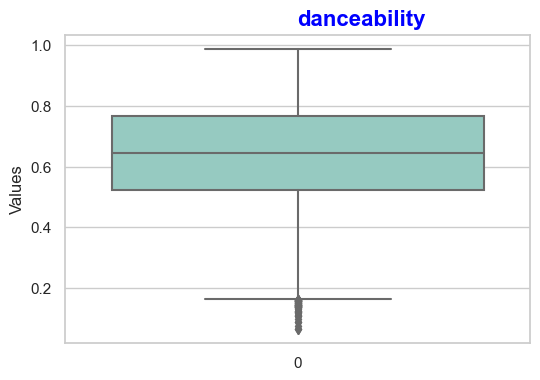

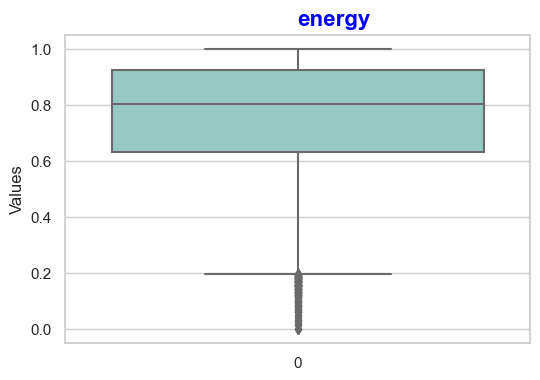

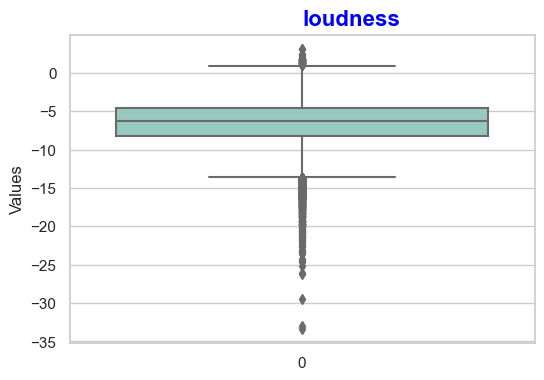

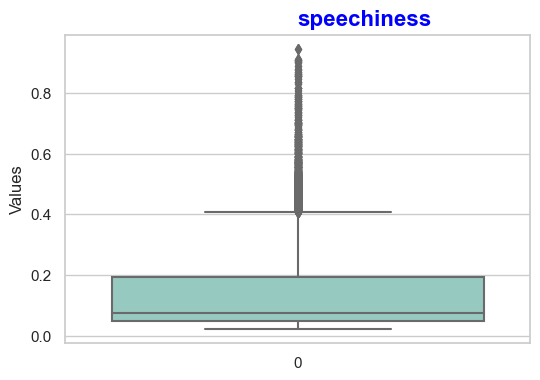

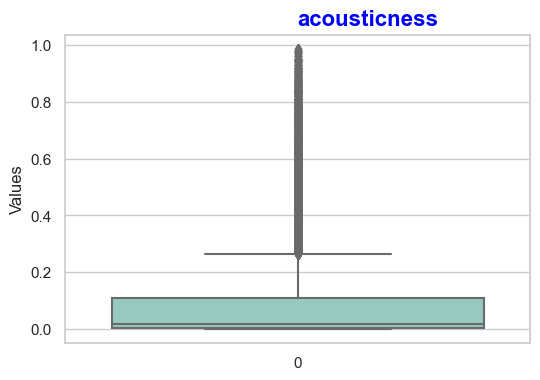

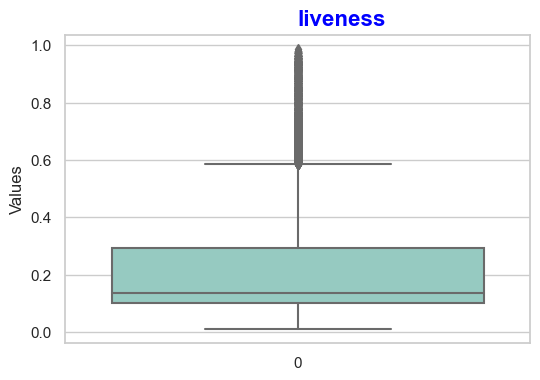

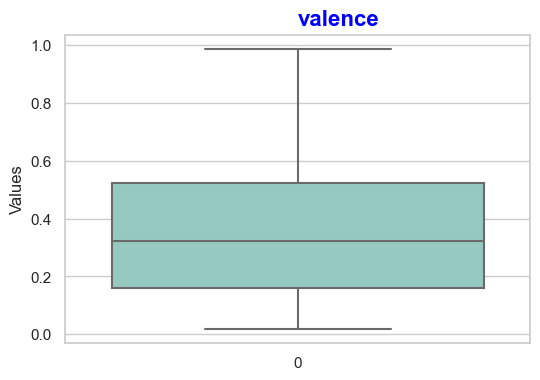

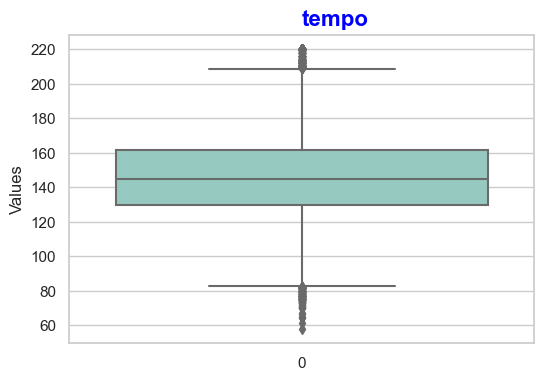

In [21]:
# The numeric columns to create box plots
numeric_columns = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo']

sns.set(style="whitegrid")

for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=data[column], palette="Set3")
    plt.xlabel
    plt.ylabel("Values")
    plt.title

    # text and set its color
    plt.text(0.5, 1.05, column, transform=plt.gca().transAxes, fontsize=16, color='blue', weight='bold', va='center')

    plt.show()

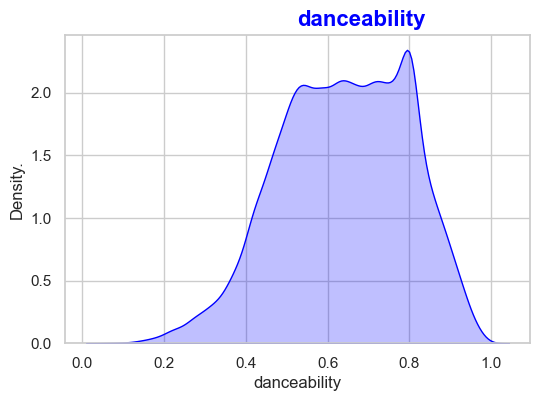

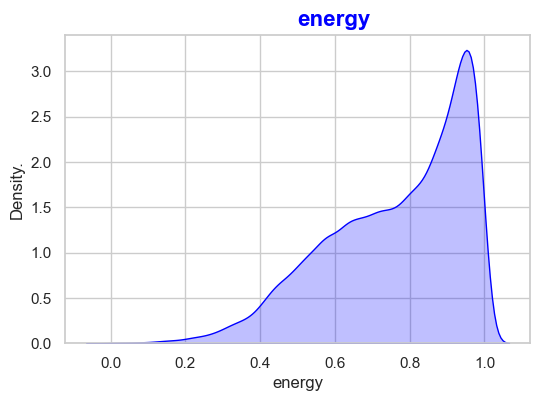

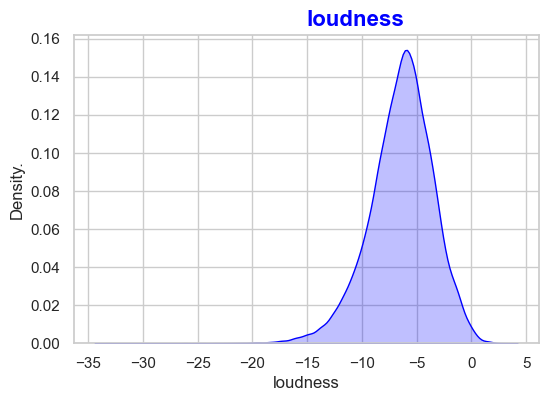

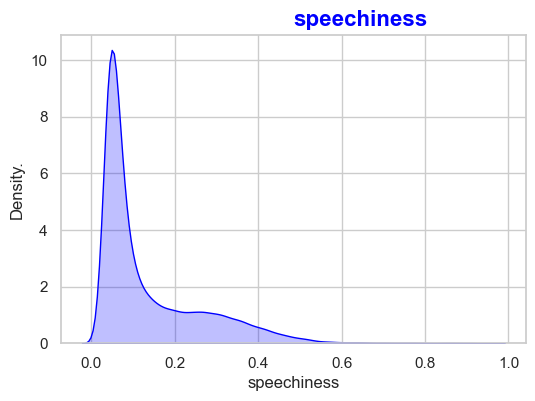

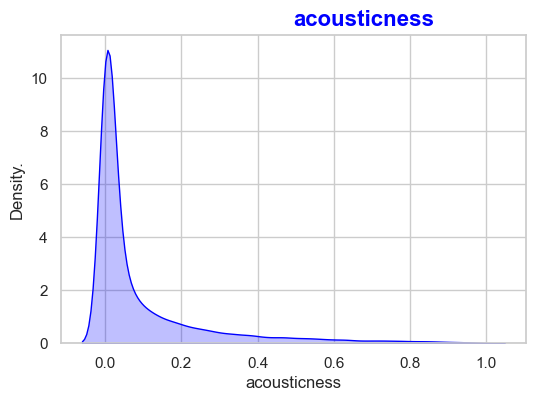

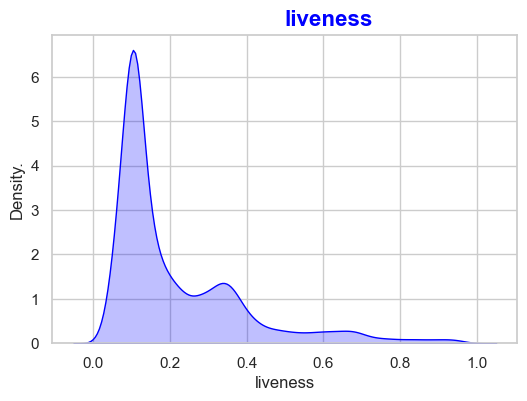

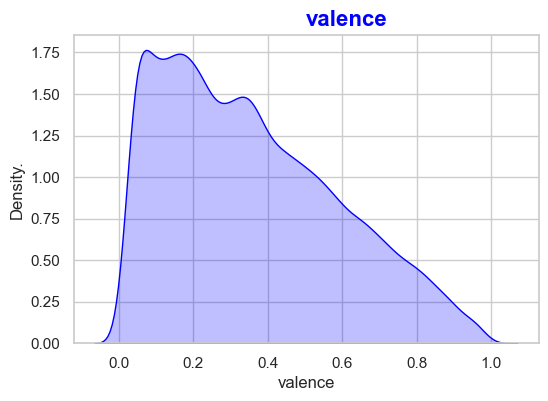

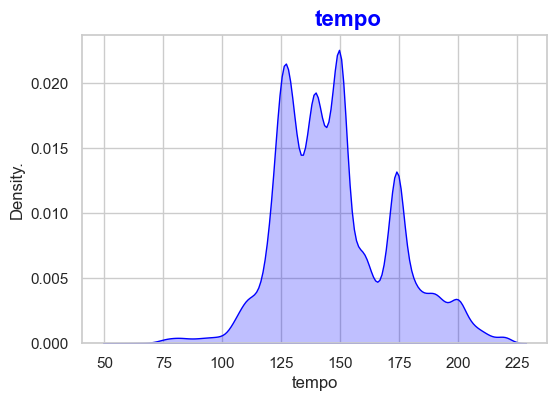

In [22]:
# The numeric columns to create density plots
numeric_columns = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo']

sns.set(style="whitegrid")

for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=data[column], color='blue', shade=True)  # Create a density plot
    plt.xlabel
    plt.ylabel("Density.")
    plt.title

    # Text and set its color
    plt.text(0.5, 1.05, column, transform=plt.gca().transAxes, fontsize=16, color='blue', weight='bold', va='center')

    plt.show()

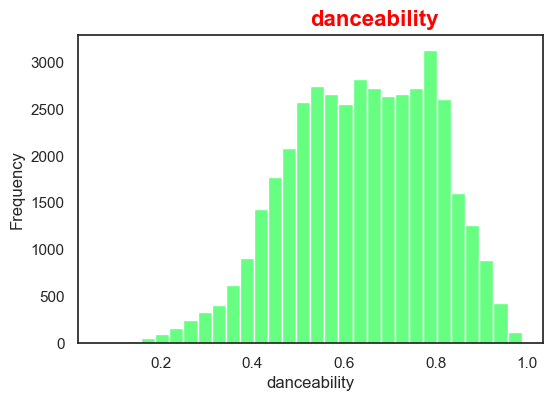

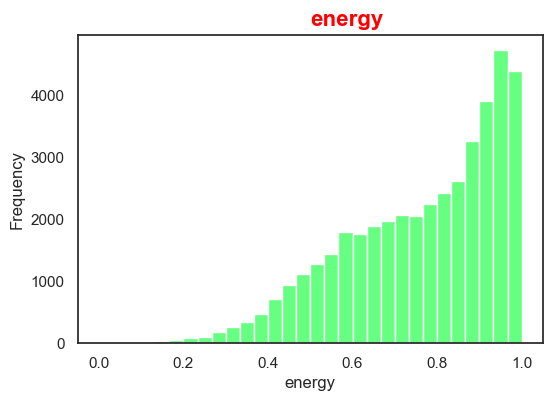

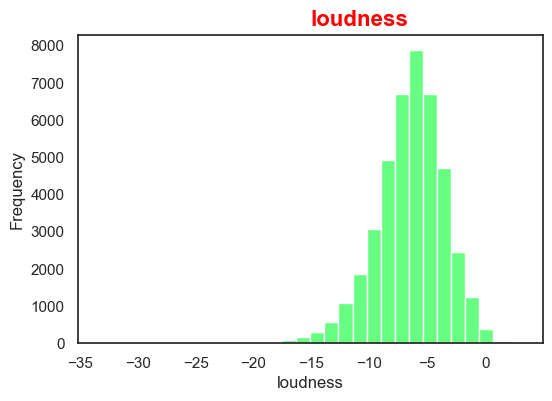

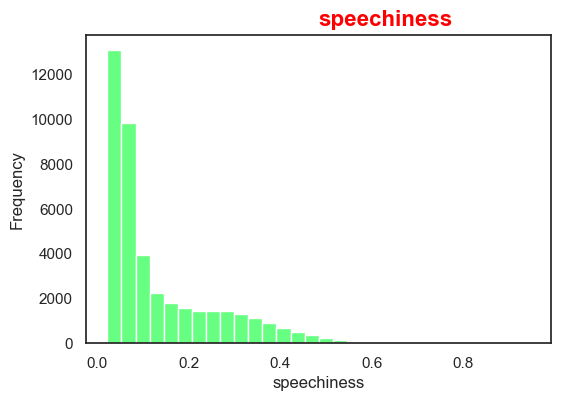

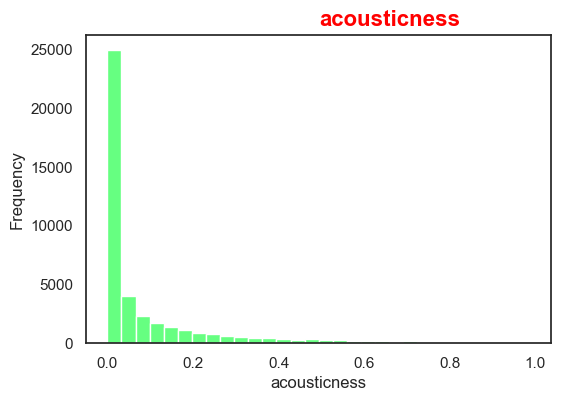

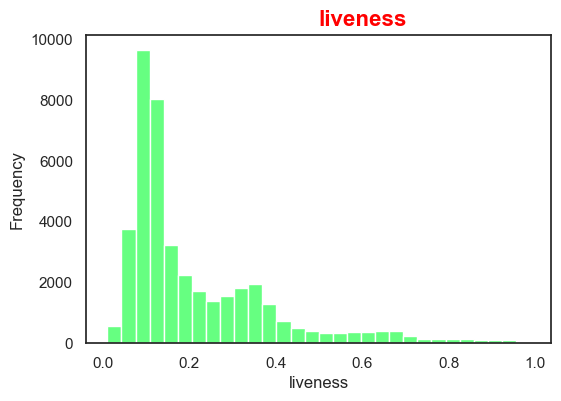

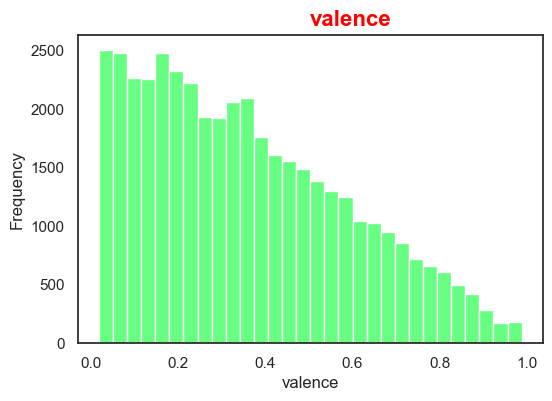

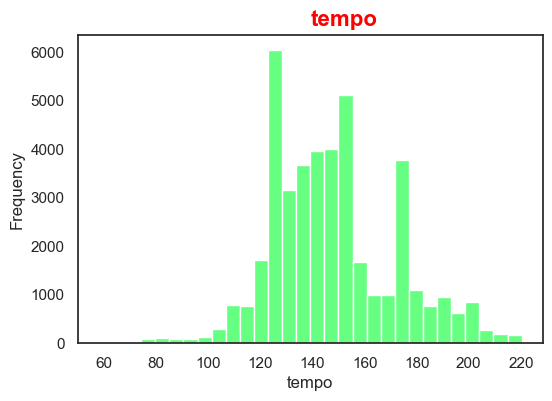

In [23]:
# The numeric columns to create histogram plots
numeric_columns = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo' ]

sns.set(style="white")

for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=data[column], color='#33FF57', bins=30)
    plt.xlabel
    plt.ylabel("Frequency")
    plt.title

    plt.text(0.5, 1.05, column, transform=plt.gca().transAxes, fontsize=16, color='red', weight='bold', va='center')

    plt.show()

In [24]:
### standardization of numerical columns
from sklearn.preprocessing import StandardScaler
numeric = data[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo' ]]


In [25]:
std = StandardScaler()
scaled = std.fit_transform(numeric)

In [26]:
scaled

array([[ 1.22360786,  0.2800791 , -0.30551447, ..., -0.90263701,
         0.13678982,  0.39887636],
       [ 0.50847965, -1.46618532, -0.25995376, ..., -0.54723051,
        -0.99958607, -1.35856366],
       [ 1.34492425,  0.70984511,  0.57203928, ...,  0.89945622,
        -1.36365518,  2.95986132],
       ...,
       [-1.77737659,  0.31815963,  1.14358824, ...,  0.97349924,
        -0.99958607,  0.31290208],
       [-1.03670809,  0.86216724,  0.57407931, ..., -0.89181534,
         0.56132271,  0.10769616],
       [-0.70468428,  0.99272907,  0.20517353, ...,  1.13867213,
        -0.95670396,  0.31759921]])

In [27]:
# 4. Genre Analysis
track_href_counts = data['track_href'].value_counts()
print(track_href_counts)

https://api.spotify.com/v1/tracks/7D5qMGajdfznFcXFArk5VE    9
https://api.spotify.com/v1/tracks/5cRDn5aGMLvWsldoRmOOz0    8
https://api.spotify.com/v1/tracks/5lXY6PTuWXOludKy4zDQwM    8
https://api.spotify.com/v1/tracks/3BSuC9Y6MhalaLlhyNbTYZ    8
https://api.spotify.com/v1/tracks/2KVv2zAjDHxymySY5EIaAz    7
                                                           ..
https://api.spotify.com/v1/tracks/6hEHxpZpvZwt1v4NoGwjKr    1
https://api.spotify.com/v1/tracks/5TvdhNXoHbeGeWtjCYhFuy    1
https://api.spotify.com/v1/tracks/0PIhZHuUMkxYIueyOJ9rSh    1
https://api.spotify.com/v1/tracks/2V28RKTOabMKk2xvIDyCEz    1
https://api.spotify.com/v1/tracks/6MAAMZImxcvYhRnxDLTufD    1
Name: track_href, Length: 35877, dtype: int64


In [28]:
# 5. Missing Values
print(data.isnull().sum())

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64


In [29]:
# Model Building
# Song Recommendation function for non-numeric type
# Function to recommend similar songs
def recommend_similar_songs(input_song):
    # Find the genre of the input song
    input_genre = data[data['song_name'] == input_song]['genre'].iloc[0]
    # Find songs with similar genres
    similar_songs = data[data['genre'] == input_genre][['song_name', 'genre', 'track_href']]
    # Shuffle the DataFrame and select a random sample of 100 songs
    similar_songs_sample = similar_songs.sample(n=100)  # Set random_state for reproducibility
    return similar_songs_sample

In [30]:
# Example usage:
input_song = "HeavyFog"
print("Top 50 songs with similar genre to", input_song)
print(recommend_similar_songs(input_song))

Top 50 songs with similar genre to HeavyFog
          song_name      genre  \
1124  Lil Parachute  Dark Trap   
109            Dirt  Dark Trap   
1751        Call Me  Dark Trap   
2915   Night Racing  Dark Trap   
3075         LV-223  Dark Trap   
...             ...        ...   
784     No Flippies  Dark Trap   
4203  Hellish Place  Dark Trap   
969         Nothin'  Dark Trap   
4295        Believe  Dark Trap   
3047     Omni Nocte  Dark Trap   

                                             track_href  
1124  https://api.spotify.com/v1/tracks/3xLDsDAlh3FP...  
109   https://api.spotify.com/v1/tracks/1LpFxoC3TDeU...  
1751  https://api.spotify.com/v1/tracks/6UPUZOQqgm3E...  
2915  https://api.spotify.com/v1/tracks/7oYe0JFd0qS1...  
3075  https://api.spotify.com/v1/tracks/6beU4YxkxWzT...  
...                                                 ...  
784   https://api.spotify.com/v1/tracks/79CRIJjREtUB...  
4203  https://api.spotify.com/v1/tracks/68BEotXgWRaz...  
969   https://api.spotify